In [ ]:
# Run face detection on a video

In [1]:
import cv2
import torch
import numpy as np
from IPython.display import display, Image 
from driver.driver import io_shape_dict
from driver.driver_base import FINNExampleOverlay
from utils import (clip_coords, scale_coords, letterbox, 
                   xywh2xyxy, non_max_suppression,  
                   visualize_boxes)
from models import Detect

In [2]:
def inference(img_org, driver):
    img = img_org.copy()
    img, ratio, (dw, dh) = letterbox(img, (416,416), auto=False)
    img = img[:, :, ::-1]

    img = img.astype(np.uint8)
    driver_in = np.expand_dims(img, 0)

    output = driver.execute(driver_in)
    output = scale*output
    output = output.transpose(0,3,1,2)

    output = torch.from_numpy(output)
    pred = detect_head([output])[0]

    pred = non_max_suppression(pred, conf_thres=0.10, iou_thres=0.10, classes=None, max_det=20)

    # Process predictions
    for i, det in enumerate(pred):  # per image

        if len(det):
            det[:, :4] = scale_coords(img.shape, det[:, :4], img_org.shape).round()

            # Write results
            for *xyxy, conf, cls in reversed(det):
                c = int(cls)  # integer class
                label = f'{names[c]} {conf:.2f}'
                left, top = int(xyxy[0]), int(xyxy[1])
                right, bottom = int(xyxy[2]), int(xyxy[3])
                cv2.rectangle(img_org, (left, top), (right, bottom), (0,255,0), thickness=1)
            
    return img_org

In [3]:
driver = FINNExampleOverlay(
    bitfile_name="./bitfile/finn-accel.bit",
    platform="zynq-iodma",
    io_shape_dict=io_shape_dict,
    batch_size=1,
    runtime_weight_dir="runtime_weights/",
)

In [4]:
names = ['face']
nc  = 1
anchors = np.array([[10,14,23,27,37,58]]) / np.array([32])
scale = np.load("./bitfile/scale.npy")
detect_head = Detect(nc, anchors)
process_rate = 5 # Process frame at every nth frame

In [5]:
video = cv2.VideoCapture("../../inputs/videos/sample.mp4")
display_handle=display(None, display_id=True)
try:
    frame_number = 0
    while True:
        _, frame = video.read()
        if frame_number % process_rate == 0:
            frame = inference(frame, driver)
           
            _, frame = cv2.imencode('.jpeg', frame)
            display_handle.update(Image(data=frame.tobytes()))
        frame_number += 1
except KeyboardInterrupt:
    pass
finally:
    video.release()
    display_handle.update(None)

None

In [ ]:
video = cv2.VideoCapture("../../inputs/videos/video1.mp4")
display_handle=display(None, display_id=True)
try:
    frame_number = 0
    while True:
        _, frame = video.read()
        if frame_number % process_rate == 0:
            frame = inference(frame, driver)
           
            _, frame = cv2.imencode('.jpeg', frame)
            display_handle.update(Image(data=frame.tobytes()))
        frame_number += 1
except KeyboardInterrupt:
    pass
finally:
    video.release()
    display_handle.update(None)

In [7]:
video = cv2.VideoCapture("../../inputs/videos/video2.mp4")
display_handle=display(None, display_id=True)
try:
    frame_number = 0
    while True:
        _, frame = video.read()
        if frame_number % process_rate == 0:
            frame = inference(frame, driver)
           
            _, frame = cv2.imencode('.jpeg', frame)
            display_handle.update(Image(data=frame.tobytes()))
        frame_number += 1
except KeyboardInterrupt:
    pass
finally:
    video.release()
    display_handle.update(None)

None

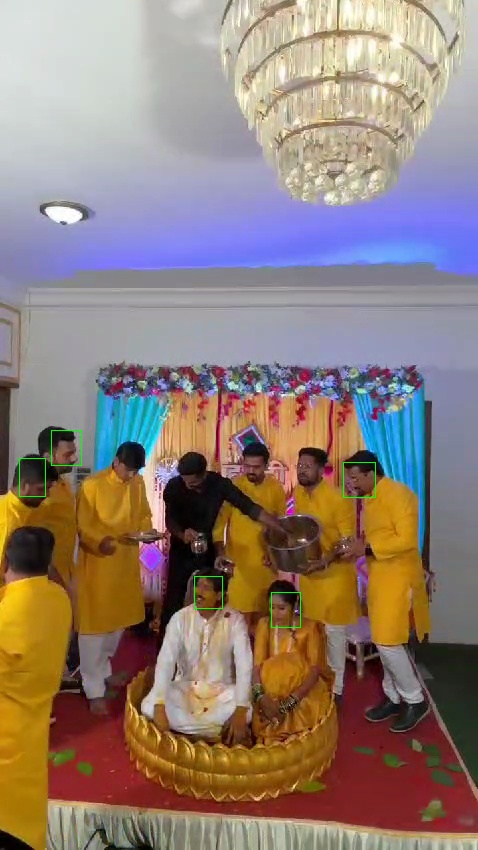

In [ ]:
video = cv2.VideoCapture("../../inputs/videos/video3.mp4")
display_handle=display(None, display_id=True)
try:
    frame_number = 0
    while True:
        _, frame = video.read()
        if frame_number % process_rate == 0:
            frame = inference(frame, driver)
           
            _, frame = cv2.imencode('.jpeg', frame)
            display_handle.update(Image(data=frame.tobytes()))
        frame_number += 1
except KeyboardInterrupt:
    pass
finally:
    video.release()
    display_handle.update(None)